In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [2]:
model = Sequential([
    Flatten(),
    Dense(units=128, activation="relu"),
    Dense(units=10, activation="linear")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [5]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2834
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3788
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2825
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2536
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2315
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2200
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2090
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1891
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1951
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1855


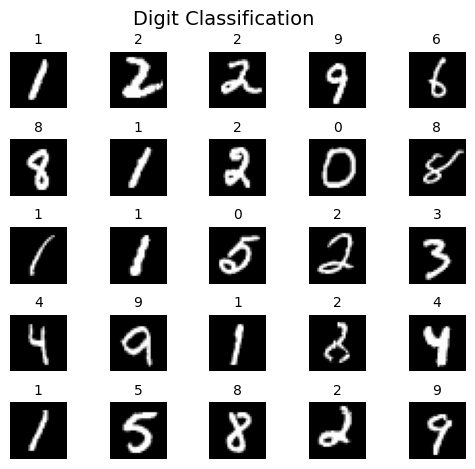

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(5, 5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
m = x_test.shape[0]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    test_example = x_test[random_index]
    ax.imshow(test_example, cmap='gray')
    prediction = np.argmax(model(test_example.reshape(1, 28, 28)))
    ax.set_title(prediction, fontsize=10)
    ax.set_axis_off()

fig.suptitle("Digit Classification", fontsize=14)
plt.show()


Not perfect, but this model would perform better after more epochs!